Data description:

Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name - Name
Sex - Sex
Age - Age
Sibsp - Number of Siblings/Spouses Aboard
Parch - Number of Parents/Children Aboard
Ticket - Ticket Number
Fare - Passenger Fare
Cabin - Cabin
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import the training data

In [3]:
train = pd.read_csv(r'train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA 

## Missing data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns, 'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing')

,column_name,percent_missing
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000
Embarked,Embarked,0.224467


As we can see, Cabin is missing well over 30% of data so we drop this entire column later.

Age is missing juat over 19% so standard practice is to impute these missing values with the mean or median.

Embarked is missing 0.22% of data, this is less than 5% so we just drop the rows containing these null values.

## Heatmap

In [8]:
corr = train.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


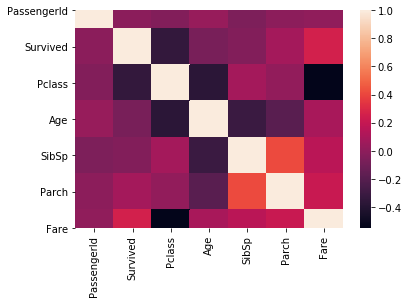

In [9]:
sns.heatmap(corr)

Domain knowledge would suggest the first place to look would be the divide between gender

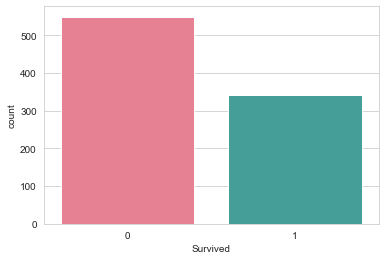

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train, palette='husl')
plt.show()

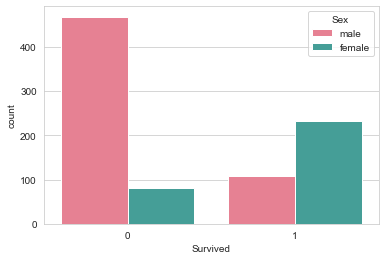

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='husl')

Interestingly enough it was not a clear split where women got the lifeboat and men were left to die. It still appears to be a factor however.

In [12]:
print("% of women survived: " , train[train.Sex == 'female'].Survived.sum()/train[train.Sex == 'female'].Survived.count())
print("% of men survived:   " , train[train.Sex == 'male'].Survived.sum()/train[train.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


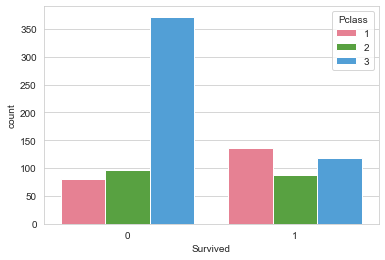

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='husl')

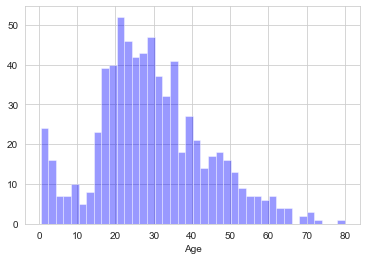

In [14]:
sns.distplot(train['Age'].dropna(), kde=False, color='blue',bins=40)

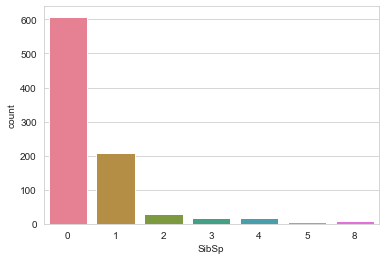

In [15]:
sns.countplot(x='SibSp',data=train,palette='husl')

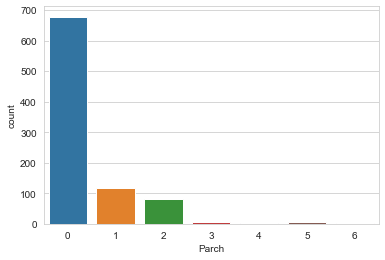

In [16]:
sns.countplot(x='Parch',data=train)

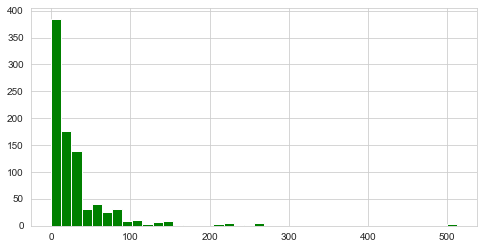

In [17]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

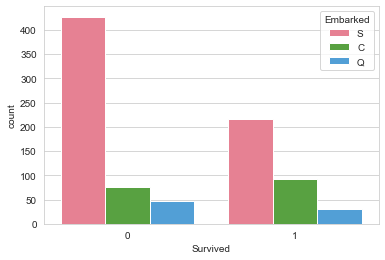

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=train,palette='husl')

## Data Cleaning

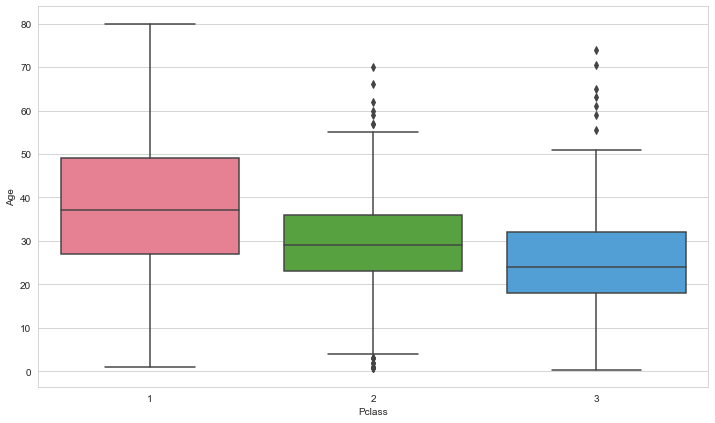

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='husl')

In [20]:
# mean of age for pclass
train['Age'][train['Pclass']==1].mean()

38.233440860215055

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return train['Age'][train['Pclass']==1].mean()
        elif Pclass == 2:
            return train['Age'][train['Pclass']==2].mean()
        else:
            return train['Age'][train['Pclass']==3].mean()
    else:
        return Age

In [22]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [23]:
train.drop('Cabin',axis=1,inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
train.dropna(inplace=True)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [27]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [28]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [29]:
train = pd.concat([train,sex,embark],axis=1)

In [30]:
corr = train.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,1.000000,-0.005028,-0.035330,0.032411,-0.057686,-0.001657,0.012703,0.043136,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.055278,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.400919,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,0.032411,-0.055278,-0.400919,1.000000,-0.242737,-0.174818,0.118050,0.085741,-0.069494,0.005249
SibSp,-0.057686,-0.034040,0.081656,-0.242737,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.174818,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.118050,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
male,0.043136,-0.541585,0.127741,0.085741,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Q,-0.033694,0.004536,0.220558,-0.069494,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,0.022269,-0.151777,0.076466,0.005249,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


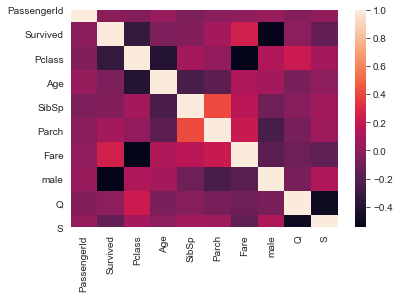

In [31]:
sns.heatmap(corr)

In [32]:
# Logistic Regression Model

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = train.drop('Survived',axis=1)

In [35]:
y = train['Survived']

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=101)

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [38]:
model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
ypred = model.predict(xtest)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
accuracy=confusion_matrix(ytest,ypred)

In [42]:
accuracy


array([[149,  14],
       [ 35,  69]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ytest,ypred)
accuracy

0.8164794007490637

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.66      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

